Notebook for graphing results from our tests

Cloud Computing Final Project
Spring 2020
Julian White, Darian Low, Yidong Hu

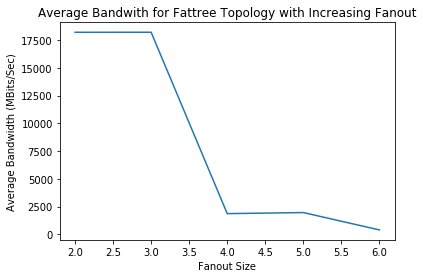

In [1]:
# Plotting average bandwidth for fattree topologies with fanouts of 2, 3, 4, and 5 
import os, os.path
%matplotlib inline
import matplotlib.pyplot as plt

DIR = '../fattree-logs/'
fanouts = [2, 3, 4, 5, 6]
fanout_list = ["fanout-2","fanout-3", "fanout-4", "fanout-5", "fanout-6"]

BW = 0.0
fanout_avg_BW = []

for fanout in fanout_list:
    fanout_total = 0
    fanout_count = 0

    logs = [name for name in os.listdir(DIR + fanout) if os.path.isfile(os.path.join(DIR + fanout, name))]

    for log in logs:
        with open(DIR + fanout + "/" + log) as file:
            lines = file.readlines()
            log_total_BW = 0
            BW = 0
            count = 0
            data_start = False
            for line in lines:
                # find start of data
                if "Interval" in line:
                    data_start = True
                    continue

                # take BW from data
                if data_start == True:
                    line_split = line.split("  ")
                    BW_score = line_split[-1]
                    BW_split = BW_score.split(" ")
                    BW = float(BW_split[-2])

                    if "Gbits" in BW_split[-1]:
                        BW *= 1000

                    last_BW = BW
                    log_total_BW += last_BW
                    count+=1

            log_total_BW -= last_BW
            if count > 0:
                fanout_total += log_total_BW
                fanout_count += count

    fanout_avg_BW.append(fanout_total/ fanout_count)

plt.plot(fanouts,fanout_avg_BW)
plt.xlabel('Fanout Size')
plt.title('Average Bandwith for Fattree Topology with Increasing Fanout')
plt.ylabel('Average Bandwidth (MBits/Sec)')
plt.show()
